## COVID-19 RNA Analysis
### Part 1: Metadata Analysis 

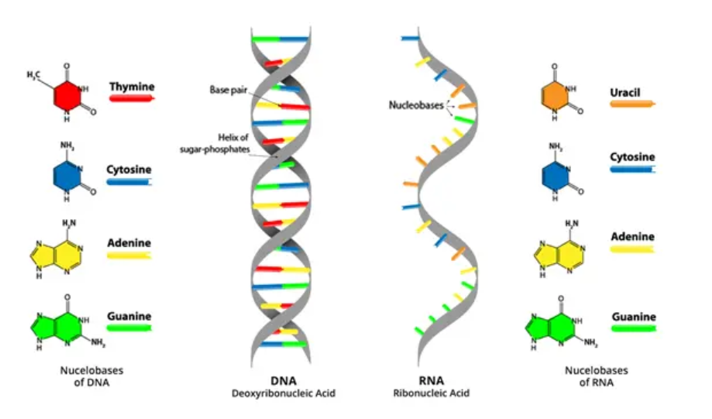

In [1]:
# Import Pandas and seaborn

import pandas as pd
import seaborn as sns

# Read in the dataset of sequence metadata from csv

data = pd.read_csv('covid.csv',dtype={5:'category'})

In [2]:
# initial exploratory analysis of data 
data.shape

(847791, 16)

In [3]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Species Taxonomy Id,847791.0,2.697049e+06,0.000000,2697049.0,2697049.0,2697049.0,2697049.0,2697049.0
Nucleotide Length,847791.0,2.982575e+04,69.937482,2859.0,29786.0,29819.0,29884.0,30018.0
US State,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Host Name,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Host Taxonomy ID,847791.0,9.606000e+03,0.000000,9606.0,9606.0,9606.0,9606.0,9606.0


In [4]:
data.head(4).transpose()

,0,1,2,3
Nucleotide Accession,NC_045512.2,OM487257.1,OM403304.1,OM403303.1
Species Taxonomy Id,2697049,2697049,2697049,2697049
Species Name,Severe acute respiratory syndrome coronavirus 2,Severe acute respiratory syndrome coronavirus 2,Severe acute respiratory syndrome coronavirus 2,Severe acute respiratory syndrome coronavirus 2
Virus Genus,Betacoronavirus,Betacoronavirus,Betacoronavirus,Betacoronavirus
Virus Family,Coronaviridae,Coronaviridae,Coronaviridae,Coronaviridae
Isolate Name,Wuhan-Hu-1,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,SARS-CoV-2/human/HKG/VM20001061-2/2020,SARS-CoV-2/human/HKG/Original/2020
Nucleotide Length,29903,29815,29870,29851
Sequence Type,RefSeq,GenBank,GenBank,GenBank
Nuc Completeness,complete,complete,complete,complete
Geo Location,Asia; China,North America; USA,Asia; Hong Kong,Asia; Hong Kong


In [5]:
# Convert collection date column to date time from string format

data['Collection Date']=pd.to_datetime(data['Collection Date'])

In [6]:
data.dtypes

Nucleotide Accession            object
Species Taxonomy Id              int64
Species Name                    object
Virus Genus                     object
Virus Family                    object
Isolate Name                  category
Nucleotide Length                int64
Sequence Type                   object
Nuc Completeness                object
Geo Location                    object
US State                       float64
Host Name                      float64
Host Taxonomy ID                 int64
Collection Date         datetime64[ns]
BioProject                      object
BioSample                       object
dtype: object

In [7]:
# Make all of the column names lower case and replace spaces with underscores

data.columns = [c.lower().replace(" ", "_") for c in data.columns]

In [8]:
data.columns

Index(['nucleotide_accession', 'species_taxonomy_id', 'species_name',
       'virus_genus', 'virus_family', 'isolate_name', 'nucleotide_length',
       'sequence_type', 'nuc_completeness', 'geo_location', 'us_state',
       'host_name', 'host_taxonomy_id', 'collection_date', 'bioproject',
       'biosample'],
      dtype='object')

In [9]:
# Create a continent column by chnaging the geolocation column

data["continent"] = data["geo_location"].str.replace(";.+", "", regex=True)

In [10]:
# Sort by continent and use lambda function to return first sequence collected in each column

data.groupby("continent").apply(lambda x: x.sort_values("collection_date").iloc[0])


,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
continent,,,,,,,,,,,,,,,,,
Africa,OL336607.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/MLI/M00960/2020,29890,GenBank,complete,Africa; Mali,NaN,NaN,9606,2020-02-06,NaN,NaN,Africa
Asia,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
Europe,OU393175.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,NaN,29890,GenBank,complete,Europe; United Kingdom:England,NaN,NaN,9606,2020-01-01,PRJEB37886,SAMEA9354774,Europe
North America,OL467832.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/hCoV_19_USA_ID_IVREF_6520...,29831,GenBank,complete,"North America; USA: Bingham, ID",NaN,NaN,9606,2020-01-01,NaN,NaN,North America
Oceania,MW320919.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/AUS/VIC16874/2020,29790,GenBank,complete,Oceania; Australia: Victoria,NaN,NaN,9606,2020-01-01,NaN,SAMN16975285,Oceania
South America,MZ477858.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/BRA/PR-HF441/2020,29779,GenBank,complete,South America; Brazil: Parana,NaN,NaN,9606,2020-01-01,NaN,NaN,South America


In [11]:
# show how many sequences were collected on each continent 

data["continent"].value_counts()


North America    571069
Europe           254520
Oceania           10603
Asia               8581
Africa             2192
South America       755
Name: continent, dtype: int64

In [12]:
# Exploratory analysis of nucleotides

data["nucleotide_length"].describe()


count    847791.000000
mean      29825.747932
std          69.937482
min        2859.000000
25%       29786.000000
50%       29819.000000
75%       29884.000000
max       30018.000000
Name: nucleotide_length, dtype: float64

In [13]:
# minimum nucleotide length, outlier that is much lower than average length
# probably a typo

data[data["nucleotide_length"] == data["nucleotide_length"].min()]


,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
847723,LR877184.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,NaN,2859,GenBank,complete,"Europe; Sweden:Stockholm, Sweden",NaN,NaN,9606,2020-04-26,PRJEB39632,SAMEA7098098,Europe


In [35]:
# Create visual for how many samples are collected and sequenced each month 

sample_month = pd.Series(data["collection_date"].values.astype("<M8[M]"))


<AxesSubplot:>

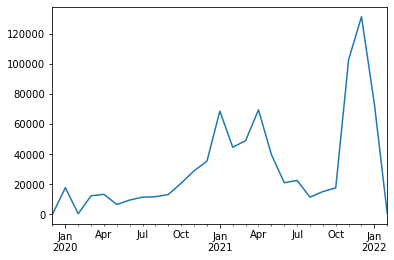

In [36]:
# Plot samples collected and sequence by month

sample_month.value_counts().sort_index().plot()


## Part 2: Downloading Sequences 

In [37]:
# Reference Sequence (RefSeq): First COVID genome ever sequenced

data[data['sequence_type']=='RefSeq']



,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia


In [38]:
# Get dataframe with rows pertaiing to just Delta variant of COVID

data[data['isolate_name'].str.contains('Delta').fillna(False)]

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
85804,OM108163.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-3/2021,29860,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-14,NaN,NaN,Asia
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-10,NaN,NaN,Asia
251375,OK091006.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,"SARS-CoV-2/human/JPN/SARS-CoV-2, B.1.617.2 lin...",29836,GenBank,complete,Asia; Japan,NaN,NaN,9606,2021-08-24,NaN,NaN,Asia
665095,OM108132.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-2/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-11,NaN,NaN,Asia


In [39]:
# Get sequences of Omnicron Variant

data[data['isolate_name'].str.contains('Omicron').fillna(False)]


,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-12-08,NaN,NaN,Asia


In [40]:
# Get reference sequence, first sequenced from north america, delta sequences,
# and Omincron sequence. These are sequences I will work with going forward

import os

sequences = ["NC_045512.2", "OL467832.1", "OM061695.1",  "OM095411.1"]

# I wil change the names to something more simple to follow, rather than alpha numeric ID above 

human_names = ["reference", "base", "delta", "omicron"]


In [41]:
# Selecrt the sequences above form the full dataframe

selected_sequences = data[data["nucleotide_accession"].isin(sequences)]


In [42]:
selected_sequences

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-10,NaN,NaN,Asia
254609,OL467832.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/hCoV_19_USA_ID_IVREF_6520...,29831,GenBank,complete,"North America; USA: Bingham, ID",NaN,NaN,9606,2020-01-01,NaN,NaN,North America
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-12-08,NaN,NaN,Asia


In [43]:
# Install Bio-Python in order to actually download the sequences

!pip install biopython


In [44]:
# Email is for identification purposes when COVID sequences are downloaded from NIH
# Entrez does the search for us

from Bio import Entrez

Entrez.email = 'JND173@protonmail.com'


In [45]:
# Crreate a function that will execute the sequence download

def download_sequence(id_code):
    ''' This function uses built in methods from Entrez in order to search, 
    read, and download the data subset we are looking for from the NIH '''
    
    handle = Entrez.esearch(db="nucleotide", term=id_code, retmax="1")
    record = Entrez.read(handle)
    handle = Entrez.efetch(db="nucleotide", id=record["IdList"][0], rettype="fasta", retmode="text")
    return handle.read()

In [46]:
# Download the sequence data

sequence_data = {}
for sequence in sequences:
    sequence_data[sequence] = {"fasta": download_sequence(sequence)}
    

In [47]:
# RNA sequences of the three sequences that we previously saved in selected_sequences variable
sequence_data

{'NC_045512.2': {'fasta': '>NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome\nATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA\nCGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAAC\nTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTG\nTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTC\nCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTAC\nGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGG\nCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGAT\nGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTC\nGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCT\nTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTA\nGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTG\nTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGG\nCCCTGATGGCT

In [48]:
# Use fasta parser from BioPython to parse the downloaded data
# Loops through the keys and values in the data 
# creates a fake file object because Bio Python only works wth files

from Bio import SeqIO
import io

for k,v in sequence_data.items():
    f = io.StringIO(v["fasta"])
    sequence_data[k]["parsed"] = list(SeqIO.parse(f, "fasta"))[0]
    

In [49]:
# Now we have the dictionary of the sequences and a parsed sequence record

sequence_data["NC_045512.2"]['parsed']


SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

## Part 3: Analysis of variant mutations in the RNA 

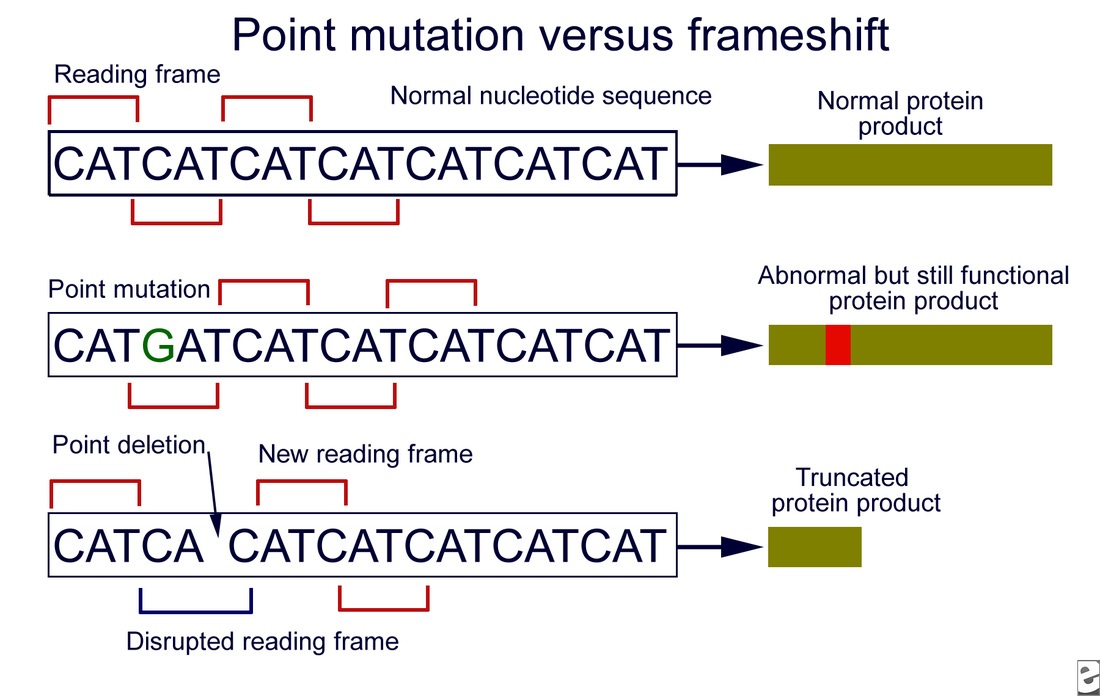

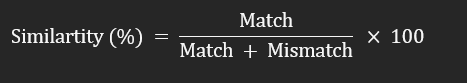

In [50]:
# Create algorithm to see where different varients have similar sequences

from Bio import Align
aligner = Align.PairwiseAligner()


In [51]:
# ALigner algorithm from Bio Puthon that will help tell us where
# sequences match and which parts are mutations
aligner.algorithm


'Needleman-Wunsch'

In [52]:
# Use aligner to generate a score that gives us alignment % between two sequences

score = aligner.score(sequence_data["NC_045512.2"]["parsed"].seq, sequence_data["OM061695.1"]["parsed"].seq)

# Score will tell us how well aligned the sequences are in relation to number of nucleotides

score


29818.0

In [53]:
# Length of the reference sequence

len(sequence_data["NC_045512.2"]['parsed'].seq)


29903

In [54]:
# Percentage of alignment between reference sequence and the first RNA sequence from north america

pct_align1 = round((29818/29903)*100,2)

print("The reference sequence and first North American sequence are",pct_align1,"% aligned")

The reference sequence and first North American sequence are 99.72 % aligned


In [55]:
# This alignemtn indicates very little mutation between the time of the first COVID sequence and the time it spread to North America Initially

## Part 4: Compare alignment scores between all of the  sequences

In [56]:
# Create comparison matrix that will check alignment scores between the sequences

import numpy as np

comparisons = np.zeros((4,4))

for i in range(0,4):
    for j in range(0,i+1):
        score = aligner.score(sequence_data[sequences[i]]["parsed"].seq, sequence_data[sequences[j]]["parsed"].seq)
        comparisons[i,j] = score

In [57]:
# turn comparison matrix into a data frame
comparison_df = pd.DataFrame(comparisons, columns=human_names, index=human_names)

In [46]:
comparison_df

,reference,base,delta,omicron
reference,29903.0,0.0,0.0,0.0
base,29820.0,29831.0,0.0,0.0
delta,29818.0,29775.0,29858.0,0.0
omicron,29725.0,29722.0,29688.0,29788.0


In [47]:
# Get percentage version of above dataframe, it is easier to interpret

comparison_df.iloc[:,0]/29903


reference    1.000000
base         0.997224
delta        0.997157
omicron      0.994047
Name: reference, dtype: float64

In [58]:
# Look at the mutation points in a few of the sequences

seq1 = sequence_data["NC_045512.2"]['parsed'].seq
seq2 = sequence_data["OM061695.1"]['parsed'].seq
delta_alignments = aligner.align(seq1,seq2)



In [59]:
# FInd the points of mutation by looking at alignments

delta_alignment = delta_alignments[0]


In [60]:

delta_alignment.shape


(2, 29943)

In [52]:
# Points where sequences are aligned or not aligned
# two tuples showing where the two sequences are aligned
# Each tuple tells you a lower and upper bound where the sequences are aligned
delta_alignment.aligned


(((0, 209),
  (210, 212),
  (212, 240),
  (241, 1047),
  (1048, 1273),
  (1274, 1276),
  (1276, 3036),
  (3037, 3038),
  (3038, 4180),
  (4181, 6401),
  (6402, 7123),
  (7123, 7124),
  (7125, 8985),
  (8986, 8989),
  (8989, 9052),
  (9053, 9054),
  (9054, 10028),
  (10028, 10029),
  (10030, 10506),
  (10507, 11116),
  (11117, 11200),
  (11201, 11331),
  (11332, 11333),
  (11333, 14407),
  (14408, 14409),
  (14409, 15450),
  (15450, 15451),
  (15452, 16465),
  (16466, 19219),
  (19220, 19221),
  (19221, 21617),
  (21618, 21986),
  (21987, 22028),
  (22029, 22030),
  (22033, 22035),
  (22037, 22916),
  (22917, 22918),
  (22918, 22994),
  (22995, 22996),
  (22996, 23402),
  (23403, 23603),
  (23604, 24409),
  (24410, 24411),
  (24411, 25087),
  (25088, 25090),
  (25090, 25351),
  (25352, 25353),
  (25353, 25468),
  (25469, 26423),
  (26424, 26425),
  (26425, 26766),
  (26767, 26768),
  (26768, 27526),
  (27527, 27637),
  (27637, 27639),
  (27640, 27751),
  (27752, 27873),
  (27874, 27876)

In [61]:
# This will print the points in the sequences where they are not aligned.
# non-alignment shows mutations in the virus RNA


seq1_end = None
seq2_end = None
for alignments in zip(delta_alignment.aligned[0], delta_alignment.aligned[1]):
    
    if seq1_end and seq2_end:
        seq1_mismatch = seq1[seq1_end:alignments[0][0]]
        seq2_mismatch = seq2[seq2_end:alignments[1][0]]
        print("1: {}".format(seq1_mismatch))
        print("2: {}".format(seq2_mismatch))
    
    seq1_end = alignments[0][1]
    seq2_end = alignments[1][1]

1: G
2: 
1: 
2: T
1: C
2: T
1: G
2: T
1: G
2: 
1: 
2: T
1: C
2: 
1: 
2: T
1: G
2: T
1: C
2: T
1: 
2: T
1: C
2: 
1: C
2: 
1: 
2: T
1: G
2: 
1: 
2: T
1: 
2: T
1: C
2: 
1: C
2: T
1: A
2: R
1: A
2: G
1: A
2: 
1: 
2: G
1: C
2: 
1: 
2: T
1: 
2: A
1: G
2: 
1: C
2: T
1: C
2: 
1: 
2: T
1: C
2: G
1: G
2: A
1: A
2: 
1: TTC
2: 
1: AG
2: 
1: T
2: 
1: 
2: G
1: C
2: 
1: 
2: A
1: A
2: G
1: C
2: G
1: G
2: 
1: 
2: A
1: G
2: 
1: 
2: T
1: G
2: 
1: 
2: T
1: C
2: T
1: T
2: 
1: 
2: C
1: T
2: 
1: 
2: C
1: C
2: T
1: 
2: C
1: T
2: 
1: C
2: T
1: C
2: 
1: 
2: T
1: G
2: 
1: TT
2: 
1: A
2: 
1: CT
2: 
1: A
2: 
1: A
2: G
1: 
2: T
1: G
2: 
1: 
2: T
1: G
2: 
1: G
2: T
1: G
2: T


In [62]:
# Mismatches printed but it doesn't show where the mismatch happened 
# or what kind of mismatch it is
# Do this below

from IPython.display import HTML    # Let us display data in html form



In [63]:
# Function will help us display mismatches with color coding

def color_print(s, color='black'):
    return "<span style='color:{}'>{}</span>".format(color, s)


In [67]:
# Improve function from above to show the type of mismatch with color coding
# and wher ethey are located

# Deletion mutation     = Red
# Substitution Mutation = Blue
# Insertion Mutation    = Green 

seq1_end = None
seq2_end = None
display_seq = []
for alignments in zip(delta_alignment.aligned[0], delta_alignment.aligned[1]):
    
    if seq1_end and seq2_end:
        seq1_mismatch = seq1[seq1_end:alignments[0][0]]
        seq2_mismatch = seq2[seq2_end:alignments[1][0]]
        if len(seq2_mismatch)==0:
            display_seq.append(color_print(seq1[seq1_end:alignments[0][0]], "red"))
        elif len(seq1_mismatch)==0:
            display_seq.append(color_print(seq2[seq2_end:alignments[1][0]], "green"))
        else:
            display_seq.append(color_print(seq2[seq2_end:alignments[1][0]], "blue"))
    
    display_seq.append(seq1[alignments[0][0]:alignments[0][1]])
    
    seq1_end = alignments[0][1]
    seq2_end = alignments[1][1]
    
    

In [68]:
# Display the mismatch sequences as strings

display_seq = [str(i) for i in display_seq]


In [69]:
# Display in html format so colorcoding will work
display(HTML('<br>'.join(display_seq)))


### Black Letters show proper alignment and colorcoded letters show mutations in the COVID virus RNA. Color codes are commented above

In [ ]:
# Convert nucleotide sequence to codons and see which individual protiens.
# mutation patterns with metadat timestamps
# which variants change the most rapidly etc. 